# <center> <font color = 'red'> **LAB 9**

## Lab 9 Report:

### FINAL PROJECT 

##### Team Members: Daniel Fredin & Cole Welch

##### Dataset for your project: Gravitational Wave - Glitch

In [1]:
%matplotlib inline

import numpy as np
import h5py 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.preprocessing import StandardScaler

from pyts.image import GramianAngularField
from pyts.image import MarkovTransitionField


# Initializes numpy and pytorch random seeds for reproducibility 
seed = 55
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [2]:
# My kernal crashes when using matplotlib: This is only workaround I found
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
hfont = {'fontname':'Encode Sans Normal Black'}
alt_hfont = {'fontname':'Uni Sans Book'}
bfont = {'fontname':'Open Sans Normal Regular'}

# plt.title('title',**csfont)
# plt.xlabel('xlabel', **hfont)
# plt.show()

# Data preparation

## Retreive dataset

In [4]:
# Define the file name
filename = 'GW3_Transformer.h5'

# Open the file
with h5py.File(filename, 'r') as file:
    # Load the datasets
    bkg_train = np.array(file['bkg_train'])
    bkg_test = np.array(file['bkg_test'])
    signal_train = np.array(file['signal_train'])
    signal_test = np.array(file['signal_test'])

In [5]:
anomaly_class = {
    'bkg': 0,
    'signal': 1
}

bkg_train_ids = np.full(bkg_train.shape[0], anomaly_class['bkg'], dtype=int)
bkg_test_ids = np.full(bkg_test.shape[0], anomaly_class['bkg'], dtype=int)

signal_train_ids = np.full(signal_train.shape[0], anomaly_class['signal'], dtype=int)
signal_test_ids = np.full(signal_test.shape[0], anomaly_class['signal'], dtype=int)

In [6]:
x_train = np.concatenate((bkg_train, signal_train), axis=0).transpose((0,2,1))
y_train = np.concatenate((bkg_train_ids, signal_train_ids), axis=0)

x_test_data = np.concatenate((bkg_test, signal_test), axis=0).transpose((0,2,1))
y_test = np.concatenate((bkg_test_ids, signal_test_ids), axis=0)

In [7]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [8]:
x_train_dec1 = x_train[:,:,0]
x_train_dec2 = x_train[:,:,1]

x_test_dec1 = x_test_data[:,:,0]
x_test_dec2 = x_test_data[:,:,1]

### Convert data to images

In [9]:
# Split data for each detector before preparing image
x_train_dec1 = x_train[:,:,0]
x_train_dec2 = x_train[:,:,1]

x_test_dec1 = x_test_data[:,:,0]
x_test_dec2 = x_test_data[:,:,1]


# Utilize GramianAngularField
from pyts.image import GramianAngularField
gaf = GramianAngularField(image_size=28)

# Convert training data to image
img_x_train_dec1 = gaf.fit_transform(x_train_dec1)
img_x_train_dec2 = gaf.fit_transform(x_train_dec2)

# Convert testing data to image
img_x_test_dec1 = gaf.transform(x_test_dec1)
img_x_test_dec2 = gaf.transform(x_test_dec2)


# Utilize MarkovTransitionField
from pyts.image import MarkovTransitionField
mtf = MarkovTransitionField(image_size=28)

# # Convert training data to image
# img_x_train_dec1 = mtf.fit_transform(x_train_dec1)
# img_x_train_dec2 = mtf.fit_transform(x_train_dec2)

# # Convert testing data to image
# img_x_test_dec1 = mtf.transform(x_test_dec1)
# img_x_test_dec2 = mtf.transform(x_test_dec2)

In [10]:
# from scipy.signal import stft


# # Assuming you have a gravitational wave signal stored in a NumPy array called 'signal'
# # 'signal' should be a 1-dimensional array representing the time-domain signal

# # Parameters for STFT
# window_length = 100  # Length of the window for STFT
# overlap = 0.8  # Overlap factor between successive windows (0.0 to 1.0)

# # Compute STFT
# frequencies, time_points, stft_data = stft(x_train_dec1[0], window='hann', nperseg=window_length, noverlap=int(window_length * overlap))

# # Plot the magnitude spectrogram
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(time_points, frequencies, np.abs(stft_data), shading='auto')
# plt.colorbar(label='Magnitude')
# plt.title('STFT Magnitude Spectrogram')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.show()


### Flatten images

In [11]:
### -------------Flatten dataset------------- ###

# First flatten each image into 2500 to convert features from 3D -> 2D arrays
x_train_flat_dec1 = img_x_train_dec1.reshape((len(img_x_train_dec1), 28 * 28))
x_train_flat_dec2 = img_x_train_dec2.reshape((len(img_x_train_dec2), 28 * 28))

x_test_flat_dec1 = img_x_test_dec1.reshape((len(img_x_test_dec1), 28 * 28))
x_test_flat_dec2 = img_x_test_dec2.reshape((len(img_x_test_dec2), 28 * 28))


# Checking the shapes of training/testing datasets
print("Training Features dec1 Shape: ", x_train_flat_dec1.shape)
print("Training Features dec2 Shape: ", x_train_flat_dec2.shape)
print("Testing Features dec1 Shape: ", x_test_flat_dec1.shape)
print("Testing Features dec2 Shape: ", x_test_flat_dec2.shape)

Training Features dec1 Shape:  (124137, 784)
Training Features dec2 Shape:  (124137, 784)
Testing Features dec1 Shape:  (21908, 784)
Testing Features dec2 Shape:  (21908, 784)


### Scale and reshape dataset

In [12]:
### -------------Scale dataset------------- ###

scaler = StandardScaler()
img_x_train_dec1 = scaler.fit_transform(x_train_flat_dec1).reshape((len(img_x_train_dec1), 28, 28))
img_x_train_dec2 = scaler.fit_transform(x_train_flat_dec2).reshape((len(img_x_train_dec2), 28, 28))

img_x_test_dec1 = scaler.fit_transform(x_test_flat_dec1).reshape((len(img_x_test_dec1), 28, 28))
img_x_test_dec2 = scaler.fit_transform(x_test_flat_dec2).reshape((len(img_x_test_dec2), 28, 28))

# Checking the shapes of training/testing datasets
print("Training Features dec1 Shape: ", img_x_train_dec1.shape)
print("Training Features dec2 Shape: ", img_x_train_dec2.shape)
print("Testing Features dec1 Shape: ", img_x_test_dec1.shape)
print("Testing Features dec2 Shape: ", img_x_test_dec2.shape)

Training Features dec1 Shape:  (124137, 28, 28)
Training Features dec2 Shape:  (124137, 28, 28)
Testing Features dec1 Shape:  (21908, 28, 28)
Testing Features dec2 Shape:  (21908, 28, 28)


### Stack Detector datasets

In [13]:
# Stack detector 1 and 2 image data together
x_train = np.stack((img_x_train_dec1, img_x_train_dec2), axis=1)
x_test = np.stack((img_x_test_dec1, img_x_test_dec2), axis=1)

#### Shrink dataset (FOR TESTING PURPOSES)

In [14]:
# Shrink data in case of memory overload
# x_train = x_train[round((len(x_train)*0.50)):]
# y_train = y_train[round((len(y_train)*0.50)):]

# Data visualization

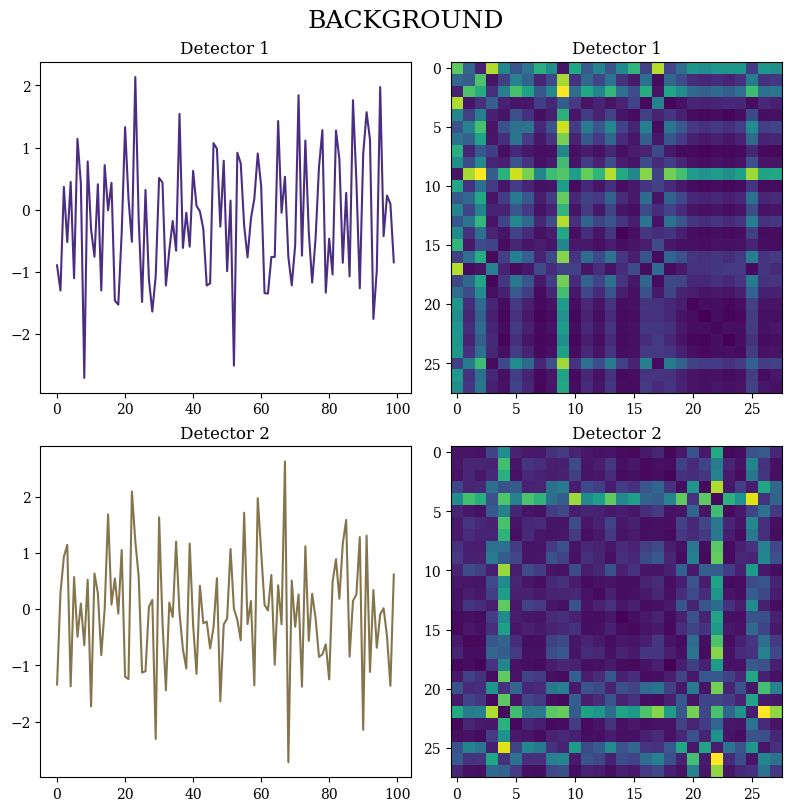

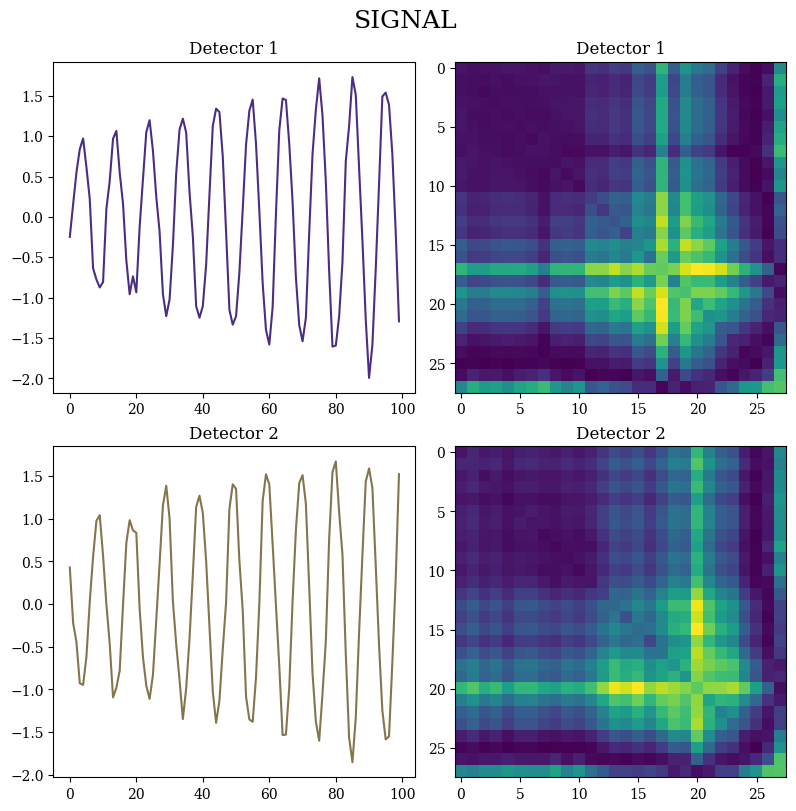

In [15]:
# Plot background training for detector 1 and detector 2
plt.figure(figsize = (8, 8), layout="constrained")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.sans-serif"] = "Open Sans"

x = np.arange(0,100,1)

# Detector 1
# Vizualizing signal training samples
plt.subplot(2,2,1) 
plt.plot(x, bkg_train[0,0], color="#4b2e83")
plt.title('Detector 1')
# Vizualizing signal training samples in 2D
plt.subplot(2,2,2) 
plt.imshow(x_train[0,0], cmap = 'viridis')
plt.title('Detector 1')

# Detector 2
# Vizualizing signal training samples
plt.subplot(2,2,3) 
plt.plot(x, bkg_train[0,1], color="#85754d")
plt.title("Detector 2")
# Vizualizing signal training samples in 2D
plt.subplot(2,2,4) 
plt.imshow(x_train[0,1], cmap = 'viridis')
plt.title("Detector 2")

plt.suptitle('BACKGROUND', fontsize = 18)

# plt.savefig("figure1.png")
plt.show()


# Plot signal training for detector 1 and detector 2
plt.figure(figsize = (8, 8), layout="constrained")

# Detector 1
# Vizualizing signal training samples
plt.subplot(2,2,1) 
plt.plot(x, signal_train[0,0], color="#4b2e83")
plt.title('Detector 1')
# Vizualizing signal training samples in 2D
plt.subplot(2,2,2) 
plt.imshow(x_train[57198,0], cmap = 'viridis')
plt.title('Detector 1')

# Detector 2
# Vizualizing signal training samples
plt.subplot(2,2,3) 
plt.plot(x, signal_train[0,1], color="#85754d")
plt.title("Detector 2")
# Vizualizing signal training samples in 2D
plt.subplot(2,2,4) 
plt.imshow(x_train[57198,1], cmap = 'viridis')
plt.title("Detector 2")

plt.suptitle('SIGNAL', fontsize = 18)
plt.show()


### Split dataset

In [16]:
### -------------Split into training and validation datasets------------- ###

# Take the first 1000 training features and targets as validation set 
x_val= x_train[:round((len(x_train)*0.1))]
y_val = y_train[:round((len(y_train)*0.1))]

# Take the remaining 9000 training features and targets as training set 
x_train = x_train[round((len(x_train)*0.1)):]
y_train = y_train[round((len(y_train)*0.1)):]

# Checking the shapes of training/validation datasets
print("X Training Shape: ", x_train.shape)
print("Y Training Shape: ", y_train.shape)
print("X Validation Shape: ", x_val.shape)
print("Y Validation Shape: ", y_val.shape)
print("X Testing Shape: ", x_test.shape)
print("Y Testing Shape: ", y_test.shape)

X Training Shape:  (111723, 2, 28, 28)
Y Training Shape:  (111723,)
X Validation Shape:  (12414, 2, 28, 28)
Y Validation Shape:  (12414,)
X Testing Shape:  (21908, 2, 28, 28)
Y Testing Shape:  (21908,)


### Reshape dataset for use in CNNs (IF NEED BE)

In [17]:
### -------------Reshape dataset for CNNs------------- ###

# Reshape train/validation/test sets to conform to PyTorch's (N, Channels, Height, Width) standard for CNNs
# x_train = np.reshape(x_train, (len(x_train), 1, 28, 28))
# x_test = np.reshape(x_test, (len(x_test), 1, 28, 28))
# x_val = np.reshape(x_val, (len(x_val), 1, 28, 28))

# Checking the shapes of training/testing/validation datasets
print("X Training Shape: ", x_train.shape)
print("X Testing Shape: ", x_test.shape)
print("X Validation Shape: ", x_val.shape)

X Training Shape:  (111723, 2, 28, 28)
X Testing Shape:  (21908, 2, 28, 28)
X Validation Shape:  (12414, 2, 28, 28)


# Define Model

In [18]:
### -------------Model Definition------------- ###
# NOTE: NEED TO CHANGE DIMENSIONS! ####################

class CNNModel(torch.nn.Module):
    
    def __init__(self):
        
        super(CNNModel, self).__init__()

        # First convolution layer (2 channel -> 16 channels, preserve original dimension by adding padding = 2) 
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=2, out_channels=16, kernel_size=5, stride = 1, padding=2),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding = 0)
            )
        
        # Second convolution layer (16 channel -> 32 channels, preserve dimension by adding padding = 2)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride = 1, padding =2),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 0)
            )

        # Fully connected layer that takes the flattened output of layer 2 (32, 7 ,7) -> (1568) and output 2 classes
        self.fc1 = torch.nn.Linear(in_features=32*7*7, out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120, out_features=84)
        self.fc3 = torch.nn.Linear(in_features=84, out_features=2)
    
    def forward(self, x):

        # input image -> conv -> batchnorm -> relu -> maxpool
        out = self.layer1(x)
        # 1st maxpool output -> conv -> batchnorm -> relu -> maxpool
        out = self.layer2(out)
        # flatten the second maxpool output to be used as input into FCN layer
        out = out.view(out.size(0), -1)

        # Pass flattened output into FCN layers
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

### Select Hyperparameters

In [19]:
### -------------Hyperparameters------------- ###

# Initialize the CNN model
model = CNNModel()

# Define learning rate, epoch and batchsize for mini-batch gradient, and L2 regularization
learning_rate = 0.000005
epochs = 10
batchsize = 501
L2_reg = 0.001

# Define loss function and optimizer
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=L2_reg)

if torch.cuda.is_available():                                  # Checks if the GPU is available for processing
    model.cuda()                                               # Sends the model to the GPU for processing
model                                                          # Check model layout and parameters

CNNModel(
  (layer1): Sequential(
    (0): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

### Identify Tracked Values

In [20]:
### -------------Identify tracked values------------- ###

train_loss_list = []
validation_accuracy_list = np.zeros((epochs,))

# Train Model

In [21]:
### -------------Training Model------------- ###

if torch.cuda.is_available():                   # If using CUDA version of PyTorch, dataset will be processed on GPU

    # Convert train/validation/test sets into torch tensors from numpy
    train_inputs = torch.from_numpy(x_train).float().cuda()
    train_targets = torch.from_numpy(y_train).long().cuda()

    validation_inputs = torch.from_numpy(x_val).float().cuda()
    validation_targets = torch.from_numpy(y_val).long().cuda()

    testing_inputs = torch.from_numpy(x_test).float().cuda()
    testing_targets = torch.from_numpy(y_test).long().cuda()

    # Split the training inputs/targets into mini-batches
    train_batches_features = torch.split(train_inputs, batchsize)
    train_batches_targets = torch.split(train_targets, batchsize)

else:                                           # If not using CUDA version of PyTorch, dataset will be processed on CPU

    # Convert train/validation/test sets into torch tensors from numpy
    train_inputs = torch.from_numpy(x_train).float()
    train_targets = torch.from_numpy(y_train).long()

    validation_inputs = torch.from_numpy(x_val).float()
    validation_targets = torch.from_numpy(y_val).long()

    testing_inputs = torch.from_numpy(x_test).float()
    testing_targets = torch.from_numpy(y_test).long()

    # Split the training inputs/targets into mini-batches
    train_batches_features = torch.split(train_inputs, batchsize)
    train_batches_targets = torch.split(train_targets, batchsize)

# length of train_batches_features = total number of mini-batches in the training set
batch_split_num = len(train_batches_features)

In [22]:
### -------------Training Loop------------- ###

for epoch in range(epochs):
    
    # Each mini-batch number i, grab i-th training feature and target mini-batch and perform fwd/bwd pass on the network
    
    for i in range(batch_split_num):
    
        optimizer.zero_grad()    
        train_batch_outputs = model(train_batches_features[i])
        loss = loss_func(train_batch_outputs, train_batches_targets[i])
        train_loss_list.append(loss.item())
        loss.backward()
        optimizer.step()

    ### -------------Compute Validation Accuracy------------- ###

    with torch.no_grad():

        validation_outputs = model(validation_inputs)
        correct = (torch.argmax(validation_outputs, dim=1) == validation_targets).type(torch.FloatTensor)                
        print("Epoch: "+ str(epoch), 
              "Validation Accuracy: " + str(np.round(correct.mean().numpy() * 100, 2)) + '%', flush=True)
        
        validation_accuracy_list[epoch] = correct.mean()

Epoch: 0 Validation Accuracy: 81.81%
Epoch: 1 Validation Accuracy: 91.16%
Epoch: 2 Validation Accuracy: 94.3%
Epoch: 3 Validation Accuracy: 94.92%
Epoch: 4 Validation Accuracy: 95.34%
Epoch: 5 Validation Accuracy: 95.72%
Epoch: 6 Validation Accuracy: 95.98%
Epoch: 7 Validation Accuracy: 96.19%
Epoch: 8 Validation Accuracy: 96.41%
Epoch: 9 Validation Accuracy: 96.54%


# Visualize & Evaluate Model

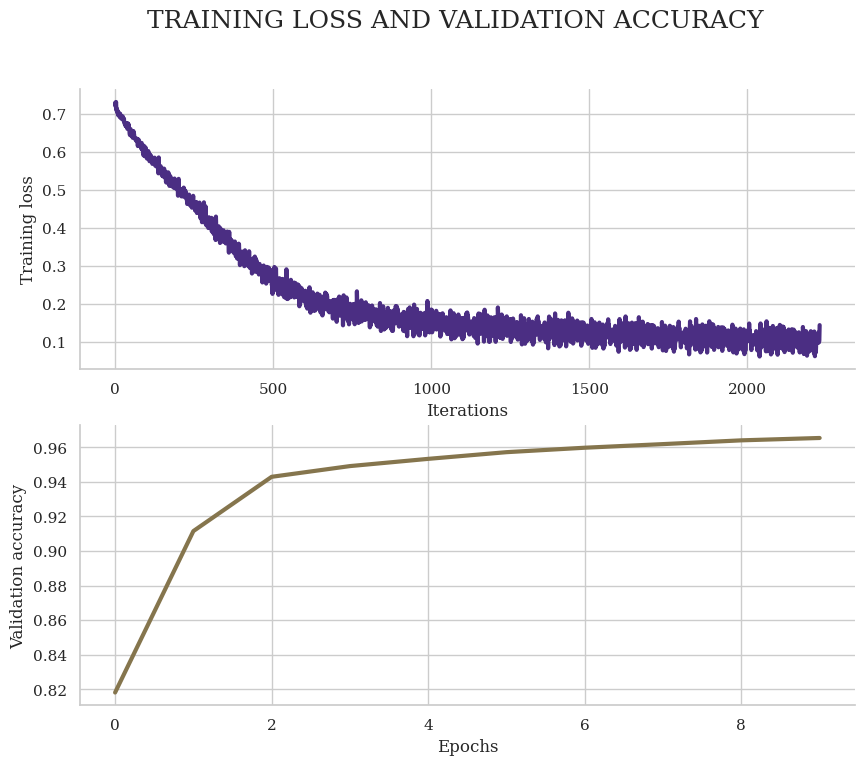

In [23]:
### -------------Plotting the training loss and validation accuracy------------- ###

# hfont = {'fontname':'Encode Sans Normal'}
# alt_hfont = {'fontname':'Uni Sans'}
# bfont = {'fontname':'Open Sans'}

sns.set(style = 'whitegrid', font_scale = 1)
plt.figure(figsize = (10, 8))
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.sans-serif"] = "Open Sans"

plt.subplot(2, 1, 1)
plt.plot(train_loss_list, linewidth = 3, color="#4b2e83")
plt.ylabel("Training loss")
plt.xlabel("Iterations")

plt.subplot(2, 1, 2)
plt.plot(validation_accuracy_list, linewidth = 3, color = "#85754d")
plt.ylabel("Validation accuracy")
plt.xlabel("Epochs")
plt.suptitle("TRAINING LOSS AND VALIDATION ACCURACY", size=18)
sns.despine()

# plt.savefig("loss_acc.png")




In [24]:
### -------------Computing the testing accuracy------------- ###
torch.cuda.empty_cache()
with torch.no_grad():

    torch.cuda.empty_cache()
    target_pred_test = model(testing_inputs)
    correct = (torch.argmax(target_pred_test, dim=1) == testing_targets).type(torch.FloatTensor)
    testing_acc = (correct.mean().numpy()*100)
    
    print("Testing Accuracy: {:.2f}%".format(testing_acc))

Testing Accuracy: 96.92%


# Incorrect predictions

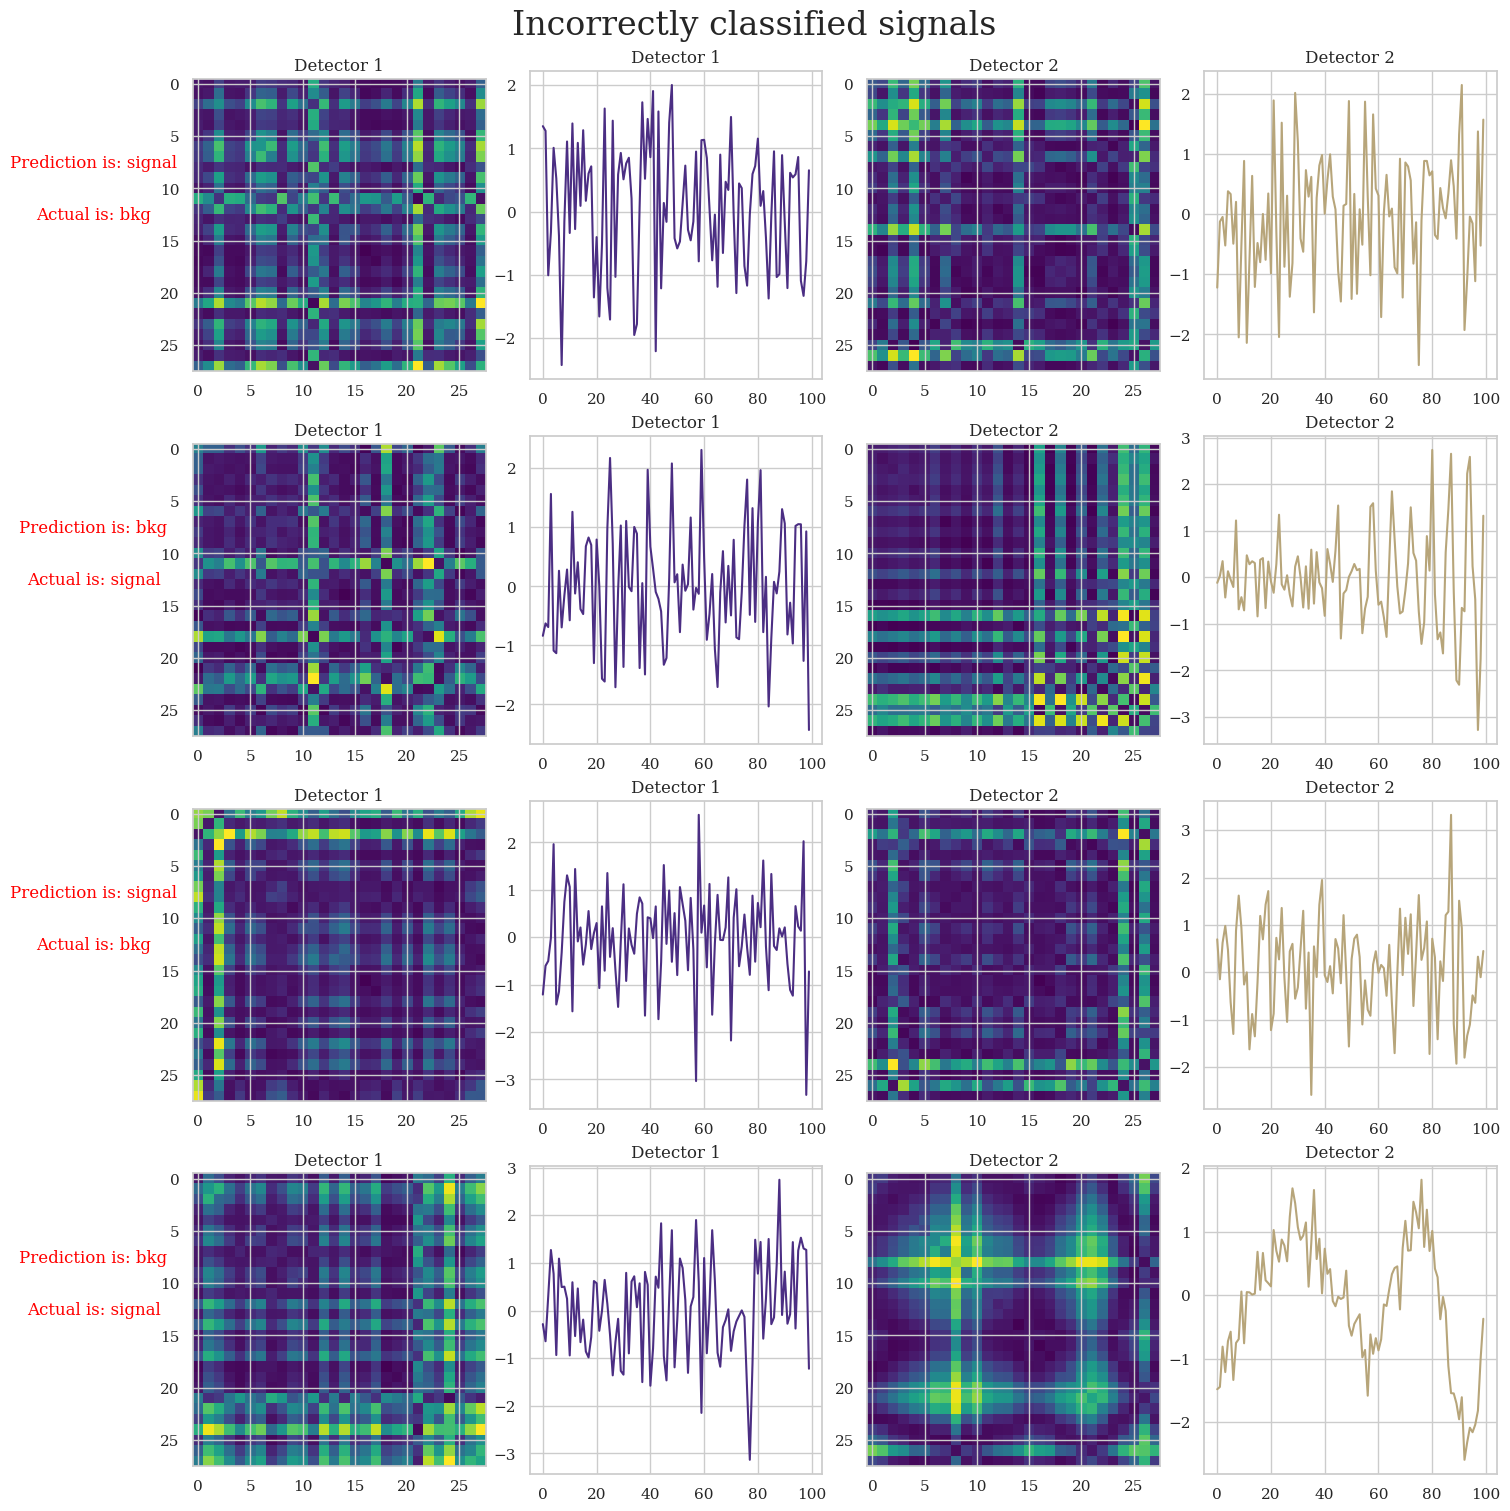

In [25]:
incorrect_index = np.array(np.where(correct == 0))          # Finds the index of the incorrect predictions
resized_testing_inputs = np.reshape(testing_inputs.cpu()
                                    .numpy(), (len(testing_inputs),2,28,28)) # Reshapes the testing inputs to (21908,2,28,28), moves to CPU 
                                                            # and converts to numpy                                                       
pred_test = target_pred_test.cpu().numpy()                  # Moves model testing outputs to CPU and converts to numpy

x = np.arange(0,100,1)
rand_idx_list = []

plt.figure(figsize = (15, 15), layout="constrained")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.sans-serif"] = "Open Sans"
np.random.seed(1)

for i in range(4):
    rand_idx = np.random.choice(incorrect_index[0,:])
    rand_idx_list.append(rand_idx.item())
    
    plt.subplot(4,4,i*4 + 1)   
    plt.imshow(resized_testing_inputs[rand_idx,0], cmap = 'viridis')
    plt.title('Detector 1')
    # Adds text to subplots and prints out the incorrect prediction of the model
    plt.text(-10, 8, "Prediction is: {}".format(list(anomaly_class.keys())
                                                [list(anomaly_class.values()).index(np.argmax(pred_test[rand_idx][:]))])
                                                , ha='center', color='red')    
    # Adds text to subplots and prints out the correct target item
    plt.text(-10, 13, "Actual is: {}".format(list(anomaly_class.keys())
                                             [list(anomaly_class.values()).index(y_test[rand_idx])])
                                             , ha='center', color='red')

    plt.subplot(4,4,i*4 + 2)  
    plt.plot(x,x_test_data[rand_idx,:,0], color="#4b2e83")
    plt.title('Detector 1')

    plt.subplot(4,4,i*4 + 3)  
    plt.imshow(resized_testing_inputs[rand_idx,1], cmap = 'viridis')
    plt.title('Detector 2')

    plt.subplot(4,4,i*4 + 4)  
    plt.plot(x,x_test_data[rand_idx,:,1], color="#b7a57a")
    plt.title('Detector 2')


plt.suptitle("Incorrectly classified signals", fontsize= 24)
# plt.savefig("results.png")
plt.show()
